<a href="https://colab.research.google.com/github/riyaprakash7827-del/ML-practice/blob/main/spam_not_spam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
path='/content/spam_not_spam_100.xlsx'

In [ ]:
df= pd.read_excel(path)

In [ ]:
df= pd.read_excel(path)

In [ ]:
df.shape

(100, 3)

In [ ]:
df.isna().sum()

,0
id,0
message,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
x= df['message']
y= df['label']

In [ ]:
print(x)

0          Win a free iPhone click now
1           Limited time offer buy now
2      Congratulations you won lottery
3     Free entry in contest reply fast
4              Claim your reward today
                    ...               
95                Reminder for payment
96                 Team lunch tomorrow
97      Project completed successfully
98               Call me after meeting
99                Monthly report ready
Name: message, Length: 100, dtype: object


In [ ]:
print(y)

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: label, Length: 100, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction=TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

In [ ]:

# convert Y_train and Y_test values as integers
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
print(y_train)

55    0
88    1
26    0
42    1
69    1
     ..
60    1
71    0
14    1
92    0
51    0
Name: label, Length: 80, dtype: int64


In [ ]:
print(y_test)

83    1
53    0
70    0
45    1
44    1
39    0
22    0
80    1
10    1
0     1
18    1
30    0
73    0
33    0
90    0
4     1
76    0
77    0
12    1
31    0
Name: label, dtype: int64


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [ ]:
# prediction on training data
y_pred= model.predict(X_test_features)
print('Model prediction:',y_pred)

Model prediction: [1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score:',accuracy)

Accuracy score: 1.0


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(precision)
print(recall)
print(f1)

1.0
1.0
1.0


In [ ]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0  9]]


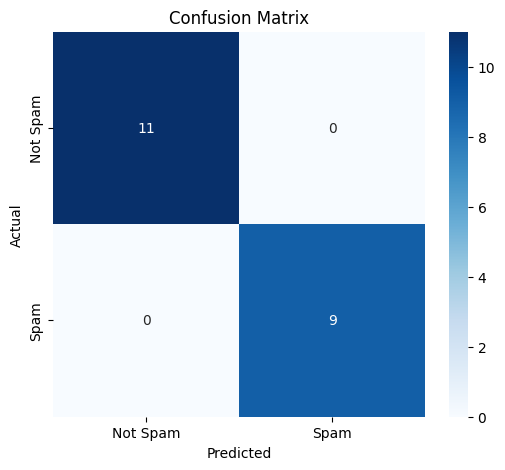

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
input_mail = input("I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times")

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')